In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
df = pd.read_csv("netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
print("Rows and columns:", df.shape)
df.info()
df.isnull().sum()


Rows and columns: (8790, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

df.fillna("Not Given", inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day


C:\Users\Anup Tasin\AppData\Local\Temp\ipykernel_19636\4136699986.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


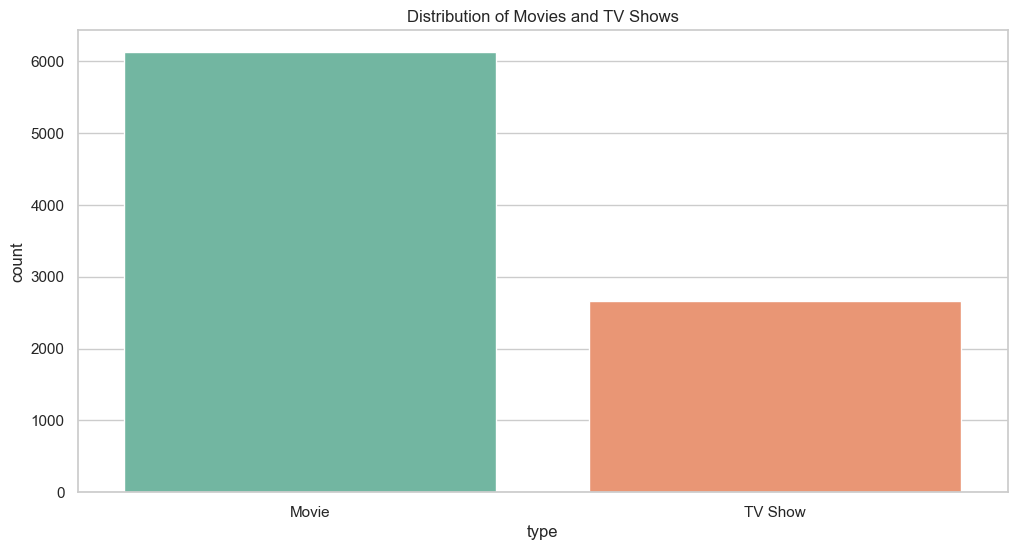

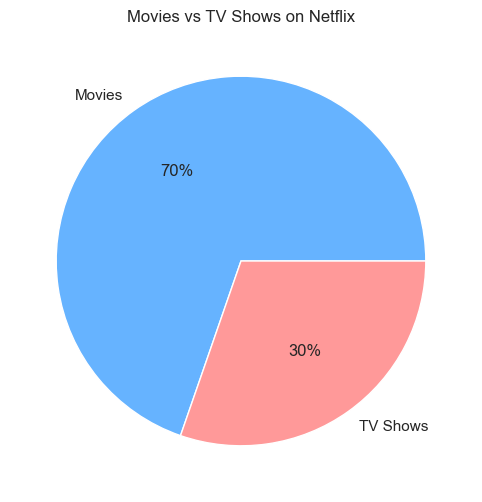

In [7]:

sns.countplot(x='type', data=df, palette='Set2')
plt.title("Distribution of Movies and TV Shows")
plt.show()


df['type'].value_counts().plot.pie(autopct='%1.0f%%', labels=['Movies', 'TV Shows'], colors=['#66b3ff','#ff9999'])
plt.title("Movies vs TV Shows on Netflix")
plt.ylabel('')
plt.show()


C:\Users\Anup Tasin\AppData\Local\Temp\ipykernel_19636\390862159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')


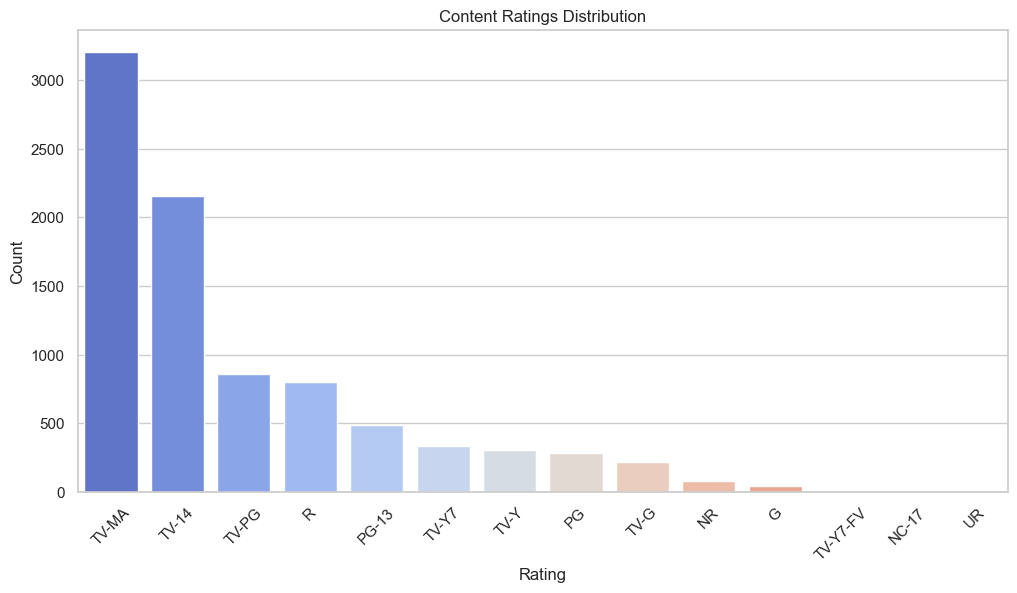

In [8]:
rating_counts = df['rating'].value_counts()

sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Content Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


C:\Users\Anup Tasin\AppData\Local\Temp\ipykernel_19636\3374918028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


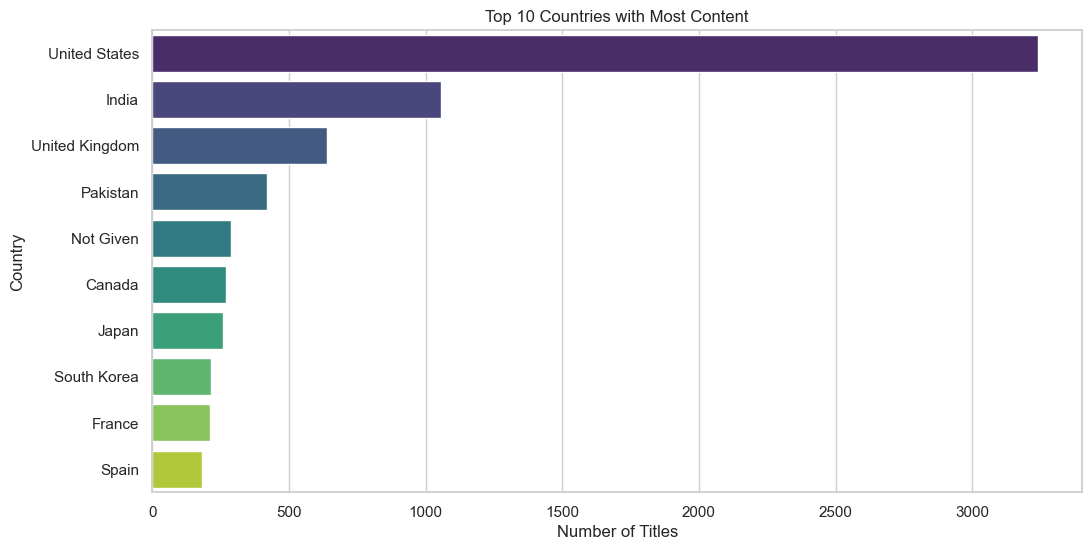

In [9]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


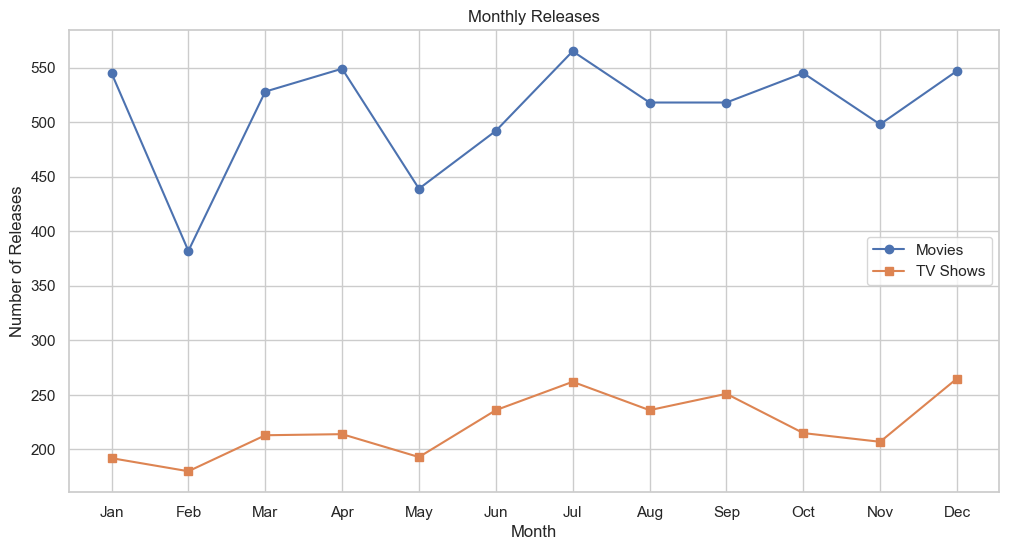

In [10]:
monthly_movies = df[df['type'] == 'Movie']['month'].value_counts().sort_index()
monthly_tv = df[df['type'] == 'TV Show']['month'].value_counts().sort_index()

plt.plot(monthly_movies.index, monthly_movies.values, label='Movies', marker='o')
plt.plot(monthly_tv.index, monthly_tv.values, label='TV Shows', marker='s')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Monthly Releases")
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.legend()
plt.grid(True)
plt.show()


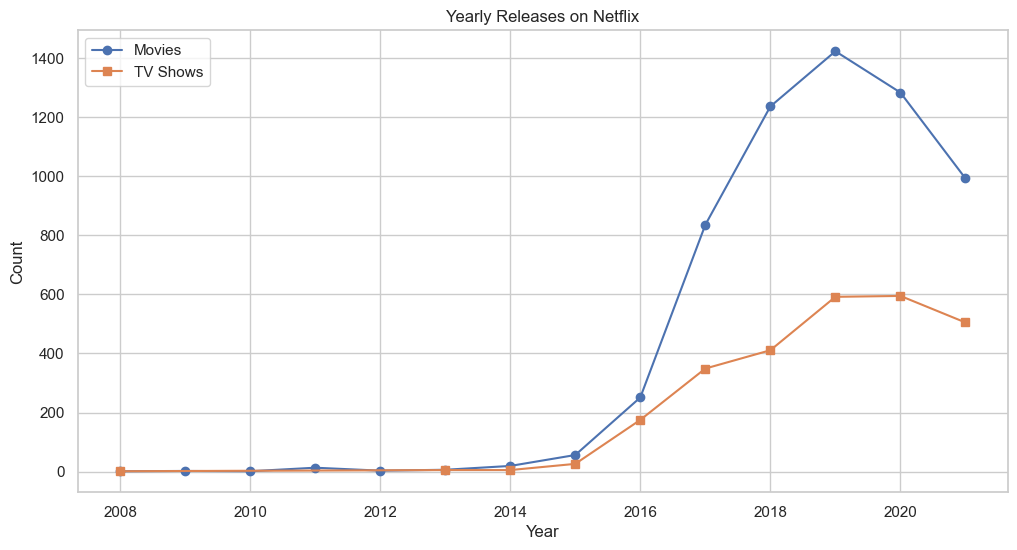

In [11]:
yearly_movies = df[df['type'] == 'Movie']['year'].value_counts().sort_index()
yearly_tv = df[df['type'] == 'TV Show']['year'].value_counts().sort_index()

plt.plot(yearly_movies.index, yearly_movies.values, label='Movies', marker='o')
plt.plot(yearly_tv.index, yearly_tv.values, label='TV Shows', marker='s')
plt.title('Yearly Releases on Netflix')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Anup Tasin\AppData\Local\Temp\ipykernel_19636\971289201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_genres.values, y=movie_genres.index, palette='mako')


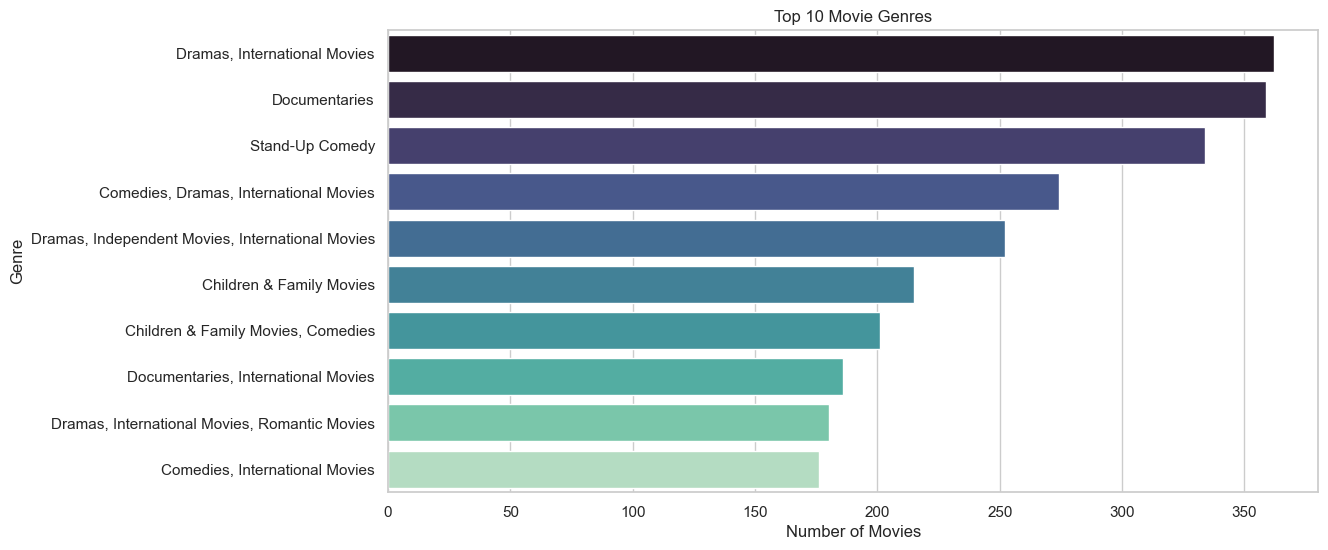

In [12]:
movie_genres = df[df['type'] == 'Movie']['listed_in'].value_counts().head(10)

sns.barplot(x=movie_genres.values, y=movie_genres.index, palette='mako')
plt.title("Top 10 Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()


C:\Users\Anup Tasin\AppData\Local\Temp\ipykernel_19636\3312002823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tv_genres.values, y=tv_genres.index, palette='rocket')


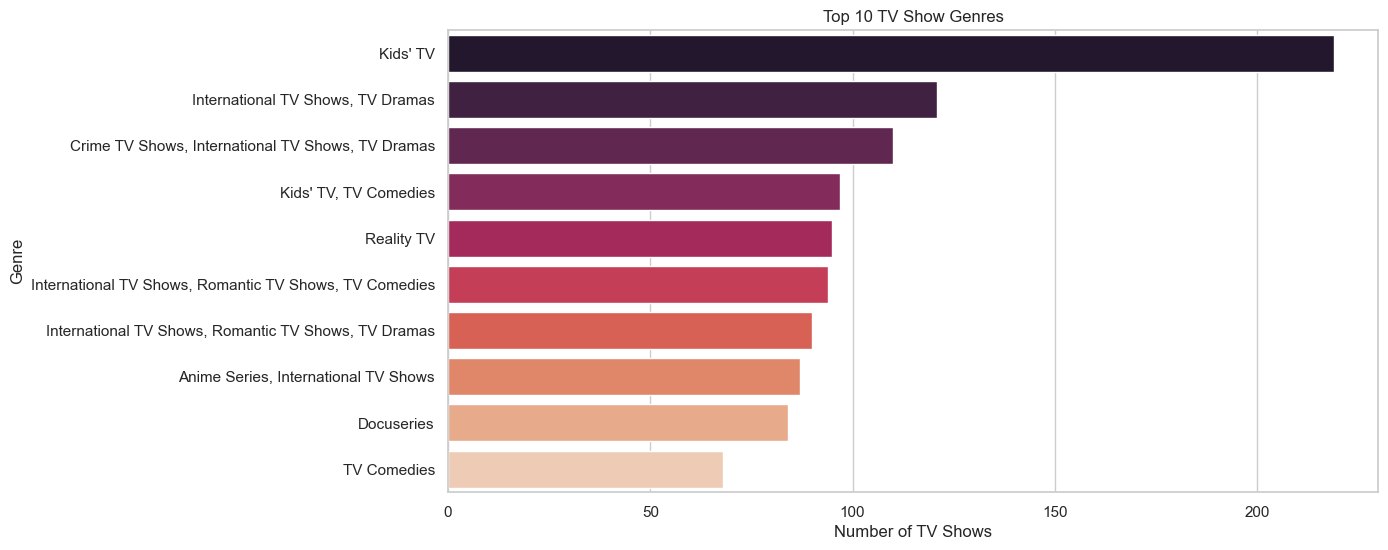

In [13]:
tv_genres = df[df['type'] == 'TV Show']['listed_in'].value_counts().head(10)

sns.barplot(x=tv_genres.values, y=tv_genres.index, palette='rocket')
plt.title("Top 10 TV Show Genres")
plt.xlabel("Number of TV Shows")
plt.ylabel("Genre")
plt.show()


C:\Users\Anup Tasin\AppData\Local\Temp\ipykernel_19636\1235552082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Accent')


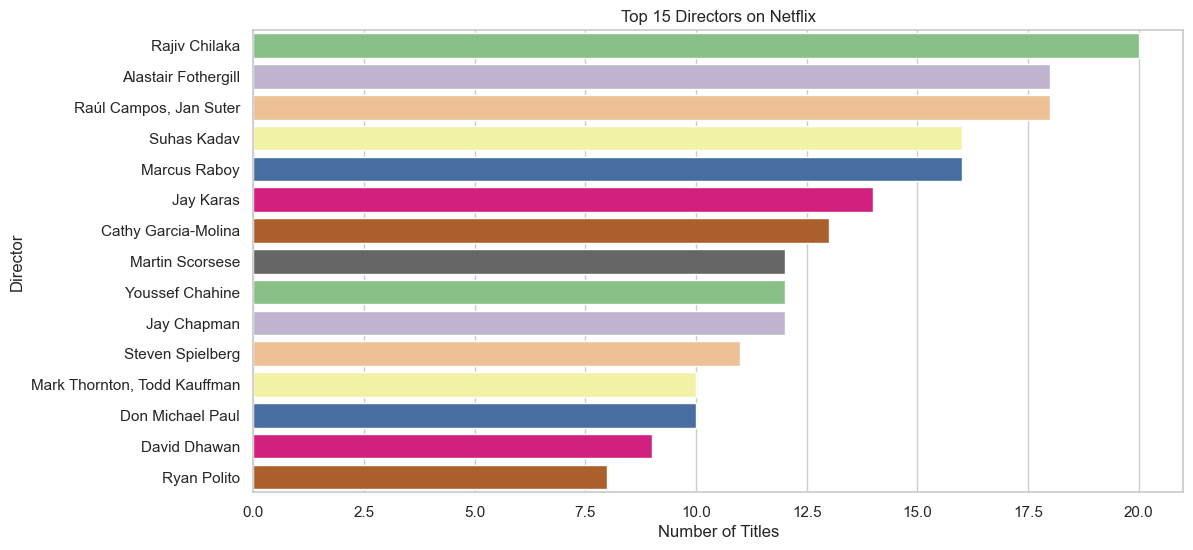

In [14]:
top_directors = df['director'].value_counts().drop('Not Given', errors='ignore').head(15)

sns.barplot(x=top_directors.values, y=top_directors.index, palette='Accent')
plt.title('Top 15 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


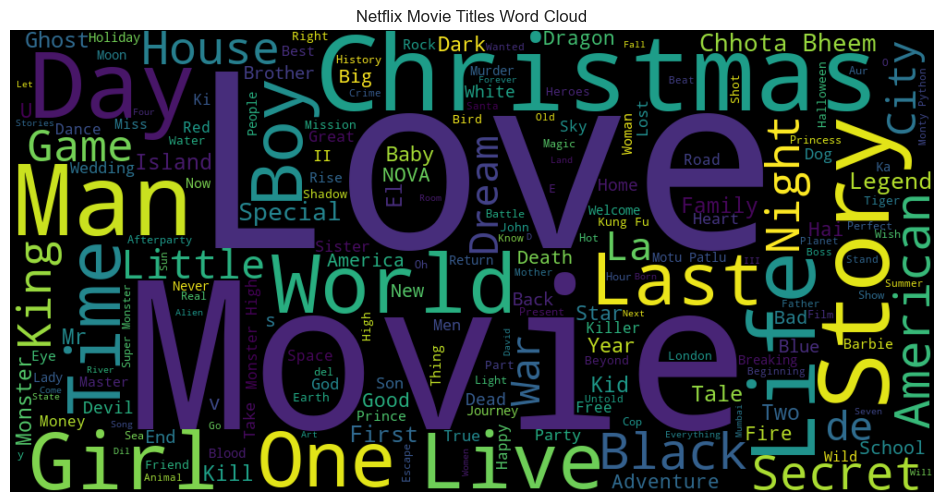

In [15]:
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(' '.join(movie_titles))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Netflix Movie Titles Word Cloud")
plt.show()
